# **Consommation énergétique résidentielle dans la Métropole du Grand Paris en 2019**

### Ce travail d'exploration des données de consommation énergétique résidentielle (électricité et gaz naturel) à l'échelle de la Métropole du Grand Paris a pour objectif de fournir des éléments d'analyse tant statistiques que cartographiques pour appréhender la répartition énergétique territoriale. Pour ce faire, la méthodologie suivante a été appliquée :
<ul> 
<li>Importation des données de consommation annuelle d'éléctricité et de gaz naturel des logements depuis le site  https://opendata.agenceore.fr/explore/dataset/conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-iris/export/. 
 Les données sont à l'échelle IRIS</li> 
<li>Analyse descriptive et visualisation des données de consommation énergétique</li> 
<li>Développement d'un algorithme de clustering pour regrouper les quartiers IRIS selon leur profil de consommation</li>
<li>Réalisation de cartes thématiques des quartiers IRIS. Les couches vectorielles (au format shapefile) sont disponibles depuis https://geoservices.ign.fr/documentation/diffusion/telechargement-donnees-libres.html#bd-topo</li>
</ul>

##### Pour pouvoir accéder au jeu de données en accès libre sur le site web de l'Agence Ore, on peut utiliser l'API du site. Une API (Application Interface Programming) est une interface qui permet de scrapper des données en ligne en servant de liaison entre un utilisateur et un serveur. Pour une documentation complètesur les API, veuillez consulter le lien https://datascientest.com/api.

In [1]:
import requests

In [2]:
response = requests.get("https://opendata.agenceore.fr/api/records/1.0/search/?dataset=conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-iris&q=&facet=operateur&facet=annee&facet=filiere&facet=libelle_commune&facet=code_departement&facet=libelle_region&refine.annee=2019&refine.libelle_region=%C3%8Ele-de-France")
print(response.status_code)

200


La librarie "requests" permet à l'API URL de retourner les données stockées sur le serveur. Un "status code" 200 indique que la requête a bien fonctionné et que les informations demandées ont été bien retournées. La structure de la donnée est affichée dans le format JSON (format constitué de paire clé-valeur).

In [3]:
response.json()

{'nhits': 10883,
 'parameters': {'dataset': 'conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-iris',
  'timezone': 'UTC',
  'rows': 10,
  'start': 0,
  'format': 'json',
  'facet': ['operateur',
   'annee',
   'filiere',
   'libelle_commune',
   'code_departement',
   'libelle_region']},
 'records': [{'datasetid': 'conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-iris',
   'recordid': 'b564c736296faf38c402eb8c3c51451973d513de',
   'fields': {'indquali': 0.429,
    'libelle_epci': 'CA Étampois Sud-Essonne (CCESE)',
    'indquala': 0.0,
    'libelle_region': 'Île-de-France',
    'filiere': 'Gaz',
    'indqualr': 0.012,
    'annee': '2019',
    'indqualt': 0.0789,
    'pdlt': 38,
    'code_region': 11,
    'pdlr': 534,
    'libelle_iris': 'Angerville (commune non irisée)',
    'consototale': 13181.890179999999,
    'partr': 0.0,
    'pdla': 0,
    'consoa': 0.0,
    'operateur': 'GRDF',
    'pdli': 7,
    'code_epci': '200017846',
    'consoi': 1914.09239,
    'nombre_maille_sec

À l'aide d'une boucle "for" on peut mieux visualiser le résultat en sélectionnant quelques variables. On peut remarquer l'API a retourné  seulement 10 enregistrements. En effet, selon la documentation de l'API, pour avoir accès à l'ensemble des données d'une requête il faut spécifier un API Key. Cette clé unique pourra être générée à la création d'un compte utilisateur via le site Opendatasoft.

In [4]:
data_prime = response.json()

for value in data_prime["records"]:
    recordid = value["recordid"]
    features = value["fields"]
    libelle_epci = features["libelle_epci"]
    code_epci = features["code_epci"]
    print(f"{recordid} | {libelle_epci} | {code_epci}")

b564c736296faf38c402eb8c3c51451973d513de | CA Étampois Sud-Essonne (CCESE) | 200017846
4e31f3e496c8f9fa2e2cebb7e2139ab29548c02e | CA Cœur d'Essonne Agglomération | 200057859
276f1a7ffe9497f4c8e9a30e8486f2096c33f416 | CA Étampois Sud-Essonne (CCESE) | 200017846
bed41d70a24bccc0fcb3c30e60c72de244d981f1 | Métropole du Grand Paris | 200054781
90a9a6940df9d0c4502d9dfda1cfb7edf2ae0556 | Métropole du Grand Paris | 200054781
70ace899816fcd16d47e0eb419752ac7945a8e54 | Métropole du Grand Paris | 200054781
aac060684006c836580de829fe4b4a76116baa4e | Métropole du Grand Paris | 200054781
b31977b0e3afef0bd38d4bd33dffc7470e310279 | Métropole du Grand Paris | 200054781
390595fd59639e7696075c669040d38979e562af | CA Cœur d'Essonne Agglomération | 200057859
36b6fe5b5c3b3fc69c38ef4667f6ef63bb305f20 | CA Communauté Paris-Saclay | 200056232


##### Pour la suite de l'exercice, les données seront de préférence importées sous format .csv.

In [5]:
#Importation des packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Lecture du dataset
df = pd.read_csv('D:/..../conso-energie-iris.csv', sep = ';')

In [7]:
#Aperçu du dataset
df.head()

,Opérateur,Année,Filière,Consommation Agriculture (MWh),Nombre de points Agriculture,Nombre de mailles secretisées (agriculture),Indique qualité Agriculture,Consommation Industrie (MWh),Nombre de points Industrie,Nombre de mailles secretisées (industrie),...,Code Commune,Libellé Commune,Code EPCI,Libellé EPCI,Code Département,Libellé Département,Code Région,Libellé Région,id_filiere,Consommation Totale (MWh)
0,Enedis,2019,Electricité,0.0,0,0,0.0,1331.015075,8,0,...,75101,Paris 1er Arrondissement,200054781,Métropole du Grand Paris,75,Paris,11,Île-de-France,100,16605.603288
1,Enedis,2019,Electricité,0.0,0,0,0.0,1423.302962,5,0,...,75101,Paris 1er Arrondissement,200054781,Métropole du Grand Paris,75,Paris,11,Île-de-France,100,8167.391297
2,Enedis,2019,Electricité,0.0,0,0,0.0,0.000000,0,0,...,75101,Paris 1er Arrondissement,200054781,Métropole du Grand Paris,75,Paris,11,Île-de-France,100,49946.238503
3,Enedis,2019,Electricité,0.0,0,1,0.0,8457.587513,9,0,...,75101,Paris 1er Arrondissement,200054781,Métropole du Grand Paris,75,Paris,11,Île-de-France,100,35975.130656
4,Enedis,2019,Electricité,0.0,0,0,0.0,417.140408,24,0,...,75101,Paris 1er Arrondissement,200054781,Métropole du Grand Paris,75,Paris,11,Île-de-France,100,32088.241910


In [8]:
#Aperçu du dataset pour voir les types des variables et les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Opérateur                                        10883 non-null  object 
 1   Année                                            10883 non-null  int64  
 2   Filière                                          10883 non-null  object 
 3   Consommation Agriculture (MWh)                   10883 non-null  float64
 4   Nombre de points Agriculture                     10883 non-null  int64  
 5   Nombre de mailles secretisées (agriculture)      10883 non-null  int64  
 6   Indique qualité Agriculture                      10883 non-null  float64
 7   Consommation Industrie (MWh)                     10883 non-null  float64
 8   Nombre de points Industrie                       10883 non-null  int64  
 9   Nombre de mailles secretisée

Ce premier dataset contient les données de consommation énergétique des communes de l'Ile de France en découpées en IRIS . Il contient 37 variables dont la plupart ne sont pas importantes pour notre analyse. On va donc le filtrer pour ne garder que les territoires et les variables d'interêt. Aucun traitement des valeurs manquantes ne sera à priori nécessaire.

In [9]:
df = df[df["Libellé EPCI"] == "Métropole du Grand Paris"]

In [10]:
df = df.iloc[:, 15:37]

In [11]:
cols_to_drop = ['Consommation Secteur Inconnu (MWh)', 'Nombre de points Secteur Inconnu',
        'Nombre de mailles secretisées (secteur inconnu)','Indice qualité Non Affecté']
df.drop(columns = cols_to_drop, inplace =True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5964 entries, 0 to 10882
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Consommation Résidentiel  (MWh)              5964 non-null   float64
 1   Nombre de points Résidentiel                 5964 non-null   int64  
 2   Nombre de mailles secretisées (résidentiel)  5964 non-null   int64  
 3   Indice qualité Résidentiel                   5964 non-null   float64
 4   Thermosensibilité (MWh/degré-jour)           5964 non-null   float64
 5   Part Thermosensible                          5964 non-null   float64
 6   Code IRIS                                    5964 non-null   object 
 7   Libellé IRIS                                 5964 non-null   object 
 8   Code Commune                                 5964 non-null   int64  
 9   Libellé Commune                              5964 non-null   object 
 10 

#### **1. Consommation moyenne d'électricité en 2019 par quartier IRIS**

Pour calculer cette consommation moyenne, le dataset est séparé en deux groupes : un pour la filière électricité et un autre pour la filière gaz naturel. Ce choix s'explique du fait que tous les bâtiments présents dans un découpage ne chauffent au gaz.

In [13]:
df_elec = df[df["id_filiere"] == 100] #pour l'électricité
df_gaz = df[df["id_filiere"] == 200] #pour le gaz

Une première analyse descriptive des données affiche une consommation moyenne 3 860.2 MWH par quartier IRIS. Dans 50 % d'entre eux la consommation électrique totale est inférieure à  3 918 MWH.

In [14]:
df_elec.describe()

,Consommation Résidentiel (MWh),Nombre de points Résidentiel,Nombre de mailles secretisées (résidentiel),Indice qualité Résidentiel,Thermosensibilité (MWh/degré-jour),Part Thermosensible,Code Commune,Code EPCI,Code Département,Code Région,id_filiere,Consommation Totale (MWh)
count,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.0,3005.000000,3005.0,3005.0,3005.000000
mean,3860.244712,1192.540765,0.025291,0.550618,0.536496,17.983275,86921.852246,200054781.0,86.848586,11.0,100.0,12088.763920
std,2316.746270,633.810687,0.157034,0.224063,0.421291,10.268353,8496.762971,0.0,8.526533,0.0,0.0,16391.454375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75101.000000,200054781.0,75.000000,11.0,100.0,0.000000
25%,2501.364946,888.000000,0.000000,0.403000,0.165703,10.400000,75117.000000,200054781.0,75.000000,11.0,100.0,5359.405821
50%,3917.971741,1206.000000,0.000000,0.562000,0.517304,20.000000,92048.000000,200054781.0,92.000000,11.0,100.0,8021.446880
75%,5088.766248,1524.000000,0.000000,0.742000,0.782966,25.700000,93066.000000,200054781.0,93.000000,11.0,100.0,12435.202589
max,55124.000000,14414.000000,1.000000,1.000000,2.768974,45.700000,95018.000000,200054781.0,95.000000,11.0,100.0,237947.810449


Dans l'analyse précédente, on peut contaster des quartiers IRIS affichant des consommations électriques nulles durant l'année 2019. Il s'agit plus précisément de découpages géographiques qui n'abritent pas de bâtiments résidentiels, et qui seront par conséquent écartés de l'analyse.

In [15]:
print("Nombre d'IRIS avec une consommation énergétique nulle: ",df_elec[df_elec["Consommation Résidentiel  (MWh)"] == 0].shape[0])
print("Nombre d'IRIS avec une consommation énergétique nulle et au moins 1 bâtiment résidentiel : ", df_elec[(df_elec["Consommation Résidentiel  (MWh)"] == 0) & (df_elec["Nombre de points Résidentiel"] != 0)].shape[0])

Nombre d'IRIS avec une consommation énergétique nulle:  192
Nombre d'IRIS avec une consommation énergétique nulle et au moins 1 bâtiment résidentiel :  0


Cette nouvelle analyse descriptive montre une augmentation de la consommation moyenne qui passe maintenant à 4 123 MWH. La consommation totale présente une variabilité importante, ce qui présage de fortes disparités de consommation entre les différents IRIS. En effet, 75 % des IRIS affichent une consommation totale inférieure de 5 173 MWH sur l'année alors que la consommation maximale enregistrée est 55 124 MWH.
Néanmoins, cette moyenne est trompeuse car elle ne prend pas en compte le poids de chaque quartier IRIS dans le calcul de cet indicateur. En effet, chacun d'eux contient un nombre donné de points résidentiels qui créent ce total de consommation observée. On lui préferera donc la moyenne pondérée qui est de 4 945 MWH sur l'année 2019.

In [16]:
df_elec = df_elec[df_elec["Consommation Résidentiel  (MWh)"]> 0]

In [17]:
df_elec.describe()

,Consommation Résidentiel (MWh),Nombre de points Résidentiel,Nombre de mailles secretisées (résidentiel),Indice qualité Résidentiel,Thermosensibilité (MWh/degré-jour),Part Thermosensible,Code Commune,Code EPCI,Code Département,Code Région,id_filiere,Consommation Totale (MWh)
count,2813.000000,2813.000000,2813.0,2813.000000,2813.000000,2813.000000,2813.000000,2813.0,2813.000000,2813.0,2813.0,2813.000000
mean,4123.723911,1273.937078,0.0,0.588200,0.573114,19.210715,87010.664771,200054781.0,86.937789,11.0,100.0,11560.057747
std,2155.663508,570.450715,0.0,0.177534,0.410622,9.436628,8460.592974,0.0,8.490521,0.0,0.0,13500.898110
min,0.980784,10.000000,0.0,0.000000,0.000000,0.000000,75101.000000,200054781.0,75.000000,11.0,100.0,43.314728
25%,2855.629282,953.000000,0.0,0.428000,0.243330,13.300000,75117.000000,200054781.0,75.000000,11.0,100.0,5590.973996
50%,4043.394453,1243.000000,0.0,0.590000,0.554446,20.600000,92049.000000,200054781.0,92.000000,11.0,100.0,8157.071862
75%,5173.282870,1551.000000,0.0,0.750000,0.807572,26.000000,93066.000000,200054781.0,93.000000,11.0,100.0,12297.025091
max,55124.000000,14414.000000,0.0,1.000000,2.768974,45.700000,95018.000000,200054781.0,95.000000,11.0,100.0,237947.810449


In [18]:
from numpy import average

print("Moyenne pondérée de consommation électrique par IRIS :", round(average(df_elec['Consommation Résidentiel  (MWh)'], weights = df_elec['Nombre de points Résidentiel']),1))

Moyenne pondérée de consommation électrique par IRIS : 4945.5


#### **2. Consommation moyenne d'électricité en 2019 par bâtiment**

Un bâtiment consomme en moyenne 3.3 MWH d'électricité pour l'année 2019 quelque soit le découpage géographique ou la commune dans laquelle il se situe.

In [19]:
conso_moy_elec = df_elec["Consommation Résidentiel  (MWh)"]/df_elec["Nombre de points Résidentiel"]
print("Consommation moyenne par bâtiment : ",round(conso_moy_elec.mean(),1))

Consommation moyenne par bâtiment :  3.3


#### **3. Consommation moyenne de gaz naturel en 2019 par quartier IRIS**

En 2019, 8 235 MWH de gaz naturel ont été consommé en moyenne par découpage géographique dans le Grand Paris. C'est 1.7 fois plus que la consommation d'électricité dans cette métropole. Les données laissent présager également d'une très forte disparité selon le territoire : 75% des quartiers IRIS affichent une consommation totale de gaz naturel inférieure à 10 000 MWH alors la consommation maximale peut atteindre jusqu'à 144 120 MWH dans certains lieux.

In [20]:
df_gaz = df_gaz[df_gaz["Consommation Résidentiel  (MWh)"] > 0]

In [21]:
df_gaz.describe()

,Consommation Résidentiel (MWh),Nombre de points Résidentiel,Nombre de mailles secretisées (résidentiel),Indice qualité Résidentiel,Thermosensibilité (MWh/degré-jour),Part Thermosensible,Code Commune,Code EPCI,Code Département,Code Région,id_filiere,Consommation Totale (MWh)
count,2813.000000,2813.000000,2813.0,2813.000000,2813.0,2813.0,2813.000000,2813.0,2813.000000,2813.0,2813.0,2813.000000
mean,7416.902597,525.665126,0.0,0.531022,0.0,0.0,87018.707785,200054781.0,86.945965,11.0,200.0,11386.197689
std,6669.387020,229.912803,0.0,0.302385,0.0,0.0,8459.586950,0.0,8.489509,0.0,0.0,11054.764232
min,4.380200,1.000000,0.0,0.000000,0.0,0.0,75101.000000,200054781.0,75.000000,11.0,200.0,4.380200
25%,3805.042580,399.000000,0.0,0.269000,0.0,0.0,75117.000000,200054781.0,75.000000,11.0,200.0,6501.214610
50%,6848.142630,523.000000,0.0,0.567000,0.0,0.0,92049.000000,200054781.0,92.000000,11.0,200.0,10172.259120
75%,9999.873420,661.000000,0.0,0.806000,0.0,0.0,93066.000000,200054781.0,93.000000,11.0,200.0,13757.541610
max,144120.372670,1676.000000,0.0,1.000000,0.0,0.0,95018.000000,200054781.0,95.000000,11.0,200.0,283945.978110


In [22]:
from numpy import average

print("Moyenne pondérée de consommation de gaz par IRIS :", round(average(df_gaz['Consommation Résidentiel  (MWh)'], weights = df_gaz['Nombre de points Résidentiel']),1))

Moyenne pondérée de consommation de gaz par IRIS : 8235.2


#### **4. Consommation moyenne de gaz naturel par bâtiment**

Un bâtiment consomme en moyenne 33.7 MWH de gaz naturel pour l'année 2019 quelque soit le découpage géographique ou la commune dans laquelle il se situe.

In [23]:
conso_moy_gaz = df_gaz["Consommation Résidentiel  (MWh)"]/df_gaz["Nombre de points Résidentiel"]
print("Consommation moyenne par bâtiment : ",round(conso_moy_gaz.mean(),1))

Consommation moyenne par bâtiment :  33.7


#### **5. Consommation énergétique totale (éléctricité et gaz naturel)**

La distribution comparative des consommations d'électricité et de gaz naturel à l'aide de leurs fonctions de densité respective montre que la consommation totale est fortement tirée par la consommation de gaz naturel.

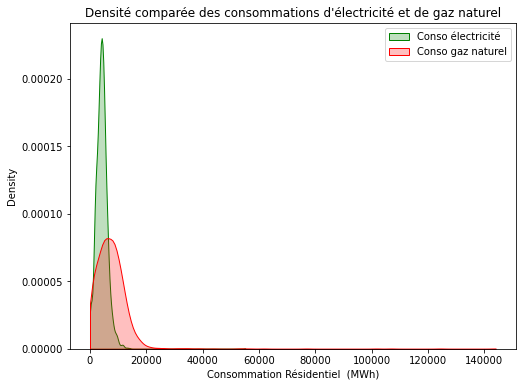

In [24]:
fig = plt.figure(figsize=(8,6))
sns.kdeplot(df_elec['Consommation Résidentiel  (MWh)'], color="green", shade=True, cut=0, label='Conso électricité')
sns.kdeplot(df_gaz['Consommation Résidentiel  (MWh)'], color="red", shade=True, cut=0, label='Conso gaz naturel')
plt.legend()
plt.title("Densité comparée des consommations d'électricité et de gaz naturel");

Dans 3 découpages sur 4, la consommation totale annuelle en électricité et en gaz naturel ne dépasse 15 000 MWH pour l'année 2019. On retrouve néanmoins une centaine de quartiers IRIS avec des pics de consommations totales supérieurs à 22 000 MWH par an (outliers). La ville de Paris compte trois IRIS dans le top 20 des territoires à forte consommation énergétique dont la plus importante de toute : le Quinze-Vingts 12 dans le 12ème arrondissement qui bat tous les records avec une inscription de 145 594 MWH au compteur pour l'année 2019. Ce quartier abrite notamment le centre hospitalier Quinze-Vingts et le fameux gare de lyon. En moyenne, la consommation résidentielle représente environ 56% de la consommation énergétique totale du quartier (tous secteurs confondus).

In [25]:
df_agg = df[["Code IRIS", "Consommation Résidentiel  (MWh)", "Consommation Totale (MWh)"]].groupby("Code IRIS").agg({"Consommation Résidentiel  (MWh)": "sum", "Consommation Totale (MWh)":"sum"})
df_agg.reset_index()

,Code IRIS,Consommation Résidentiel (MWh),Consommation Totale (MWh)
0,751010101,5080.579650,21209.743968
1,751010102,1102.508535,8609.355299
2,751010103,2133.403236,10594.271637
3,751010104,0.000000,49946.238503
4,751010105,0.000000,4219.406363
...,...,...,...
2977,950180903,14274.229490,35645.298819
2978,950181001,16510.533272,18487.575172
2979,950181002,12179.014974,16065.110954
2980,950181003,12649.047472,15195.056121


In [26]:
df_agg = df_agg[df_agg["Consommation Résidentiel  (MWh)"] > 0]
df_agg["ratio"] = df_agg["Consommation Résidentiel  (MWh)"] / df_agg["Consommation Totale (MWh)"]
df_agg.head()

,Consommation Résidentiel (MWh),Consommation Totale (MWh),ratio
Code IRIS,,,
751010101,5080.579650,21209.743968,0.239540
751010102,1102.508535,8609.355299,0.128059
751010103,2133.403236,10594.271637,0.201373
751010201,12564.674120,46741.131106,0.268814
751010202,10622.967976,33365.431159,0.318382


In [27]:
df_agg.describe()

,Consommation Résidentiel (MWh),Consommation Totale (MWh),ratio
count,2869.000000,2.869000e+03,2869.000000
mean,11315.365063,2.559111e+04,0.561443
std,7582.915008,5.026743e+04,0.228706
min,0.980784,4.331473e+01,0.000820
25%,7197.102268,1.394232e+04,0.425818
50%,11085.526618,1.884537e+04,0.596868
75%,14783.759263,2.580017e+04,0.731982
max,145593.654419,1.661133e+06,1.000000


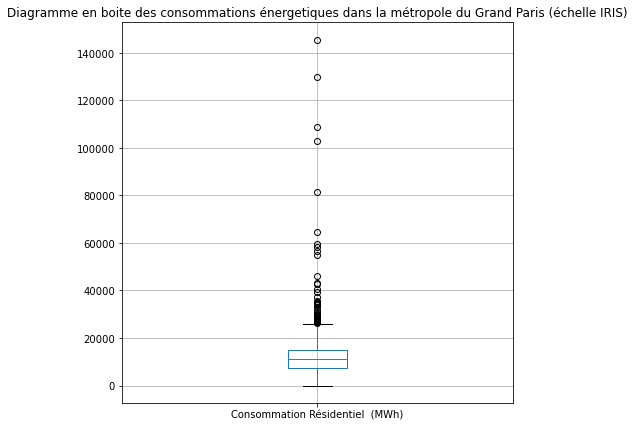

In [28]:
df_agg.boxplot(column= 'Consommation Résidentiel  (MWh)', figsize= (7,7))
plt.title('Diagramme en boite des consommations énergetiques dans la métropole du Grand Paris (échelle IRIS)');  

In [29]:
print("Nombre de quartiers IRIS ayant une consommation supérieure à 22k MWH :", df_agg[df_agg["Consommation Résidentiel  (MWh)"] > 22000].shape[0])

Nombre de quartiers IRIS ayant une consommation supérieure à 22k MWH : 107


In [30]:
#Le top 20 des quartiers IRIS ayant une consommation totale supérieure à 22k MWH
top_20 = df_agg[df_agg["Consommation Résidentiel  (MWh)"] > 22000].sort_values(by ='Consommation Résidentiel  (MWh)', ascending = False).head(20)
top_20.reset_index()

,Code IRIS,Consommation Résidentiel (MWh),Consommation Totale (MWh),ratio
0,751124812,145593.654419,192850.024313,0.754958
1,940410302,129719.810976,158730.811280,0.817231
2,920260701,108974.512467,123391.573620,0.883160
3,930050207,103007.375856,108561.216728,0.948841
4,751155908,81388.212723,213036.110336,0.382040
5,940280407,64444.383973,70963.354465,0.908136
6,940280207,59462.181117,117109.887939,0.507747
7,920620401,58239.908557,69155.538868,0.842158
8,930500114,56534.762149,81172.500760,0.696477
9,94079XXXX,55124.000000,73647.000000,0.748489


In [31]:
#Pour afficher les noms des quartiers IRIS
df[df["Code IRIS"].isin(top_20.index)][["Code IRIS", "Libellé IRIS","Libellé Commune", "id_filiere","Consommation Résidentiel  (MWh)","Consommation Totale (MWh)"]].sort_values(by = "Code IRIS", ascending = True)

,Code IRIS,Libellé IRIS,Libellé Commune,id_filiere,Consommation Résidentiel (MWh),Consommation Totale (MWh)
60,751083002,Faubourg du Roule 2,Paris 8e Arrondissement,100,7632.715265,50018.585943
8740,751083002,Faubourg du Roule 2,Paris 8e Arrondissement,200,27515.148000,35116.196540
6519,751124812,Quinze-Vingts 12,Paris 12e Arrondissement,100,1473.281749,48475.829513
2811,751124812,Quinze-Vingts 12,Paris 12e Arrondissement,200,144120.372670,144374.194800
6597,751155908,Grenelle 8,Paris 15e Arrondissement,100,4496.247753,49240.806536
4581,751155908,Grenelle 8,Paris 15e Arrondissement,200,76891.964970,163795.303800
202,751176501,Ternes 1,Paris 17e Arrondissement,100,9685.724712,39368.803270
4631,751176501,Ternes 1,Paris 17e Arrondissement,200,24890.215870,35694.445200
10170,916870103,La Cilof 1,Viry-Châtillon,100,2402.316845,5820.670867
9294,916870103,La Cilof 1,Viry-Châtillon,200,34997.942390,37689.553510


#### **6. Relation entre l'indice de qualité résidentielle et la consommation énergétique**

Aucune corrélation significativement importante n'a été décelée dans la relation entre l'indice de la qualité résidentielle et la consommation énergétique, qu'il s'agit de l'électricité ou de gaz naturel.

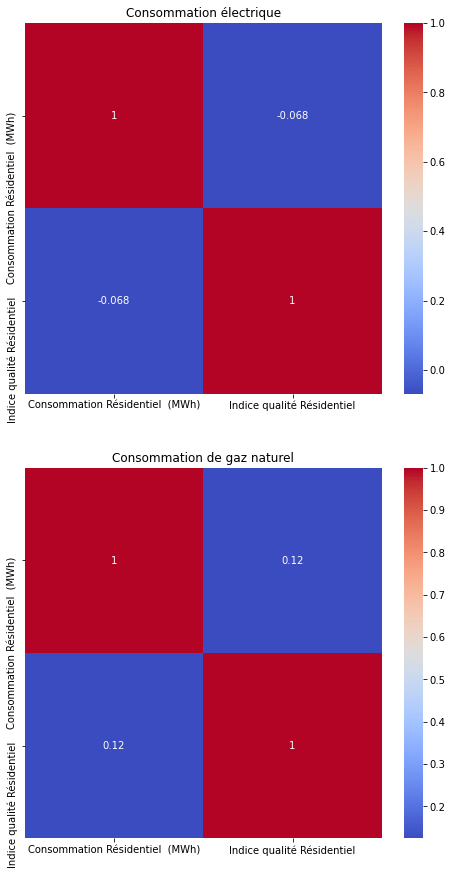

In [32]:
fig, axs = plt.subplots(2, 1, figsize=(8, 15))

corr_elec = df_elec[["Consommation Résidentiel  (MWh)", "Indice qualité Résidentiel"]].corr()
sns.heatmap(corr_elec,annot = True, cmap="coolwarm", ax =axs[0])
axs[0].set_title('Consommation électrique')

corr_gaz = df_gaz[["Consommation Résidentiel  (MWh)", "Indice qualité Résidentiel"]].corr()
sns.heatmap(corr_gaz,annot = True, cmap="coolwarm", ax = axs[1])
axs[1].set_title('Consommation de gaz naturel');

Cette analyse descriptive étant terminée, on garde le fichier pour pouvoir l'utiliser par la suite pour préparer la carte thématique.

In [33]:
df_agg = df_agg.reset_index()
df_agg.head(5)

,Code IRIS,Consommation Résidentiel (MWh),Consommation Totale (MWh),ratio
0,751010101,5080.579650,21209.743968,0.239540
1,751010102,1102.508535,8609.355299,0.128059
2,751010103,2133.403236,10594.271637,0.201373
3,751010201,12564.674120,46741.131106,0.268814
4,751010202,10622.967976,33365.431159,0.318382


#### 7. Regroupement des quartiers ayant des profils de consommation énergétique semblables

Dans cette section, nous nous proposons de réaliser un clustering des quartiers IRIS qui consomment en moyenne à peu près la même quantité d'énergie à l'année. L'algorithme K-Means sera utilisé. Une première étape de pre-processing est nécessaire sur les données pour réduire l'effet de la variance et des valeurs extrêmes. Le choix de la méthode de feature scaling (MinMax ou Standardisation) se fera en fonction de la normalité de la distribution statistique de la variable qui sera testée en utilisant le test d'Anderson-Darling.

In [34]:
data = df_agg.iloc[:, 1:2]

In [35]:
#Ici l'hypothèse Ho: Distribution normale est rejettée
from scipy.stats import anderson
print(anderson(data["Consommation Résidentiel  (MWh)"], dist='norm'))

AndersonResult(statistic=58.05167307595684, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns= data.columns)

Le choix du nombre de clusters optimal se fait à l'aide de la méthode du coude ou celle de la silhouette. Cette dernière mesure à la fois l'homogénéité intra-cluster et la séparation inter-clusters. S'il est difficile d'arriver à une conclusion avec la courbe distorsion, en revanche l'analyse des coefficients silhouette indique clairement 6 ou 8 clusters. On choisira d'en garder 6 pour une plus grande homogénéité.

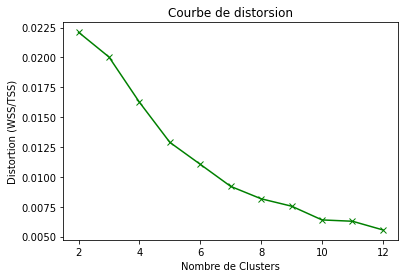

In [37]:
from scipy.spatial.distance import cdist    
from sklearn.cluster import KMeans

nb_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12]          
distortions = []                            

for id_cluster in nb_clusters:
    cluster = KMeans(n_clusters = id_cluster)  
    cluster.fit(data_scaled)                            
    distortions.append(sum(np.min(cdist(data_scaled, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(data_scaled, axis = 0))

# Visualisation des distortions en fonction du nombre de clusters
plt.plot(nb_clusters, distortions, 'gx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Distortion (WSS/TSS)')
plt.title('Courbe de distorsion');

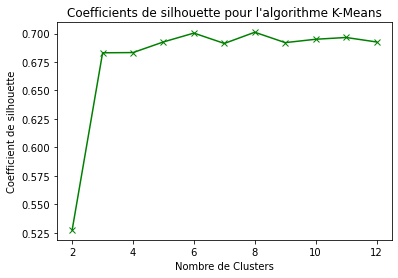

In [38]:
from sklearn.metrics import silhouette_score

s_scores = [] # Initialisation de la liste des coefficients de la silhouette score

for id_cluster in nb_clusters:
    cluster = KMeans(n_clusters = id_cluster)  
    cluster.fit(data_scaled)                            
    labels = cluster.labels_
    s_score = silhouette_score(data_scaled, labels, metric='sqeuclidean')
    s_scores.append(s_score)
    
# Visualisation
plt.plot(nb_clusters, s_scores, 'gx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Coefficient de silhouette')
plt.title("Coefficients de silhouette pour l'algorithme K-Means")
plt.show();

In [39]:
kmeans_final = KMeans(n_clusters = 6)
kmeans_final.fit(data_scaled)

centroids_final = kmeans_final.cluster_centers_ 
labels_final = kmeans_final.labels_  

In [40]:
df_agg['cluster_id'] = labels_final
df_agg.head(5)

,Code IRIS,Consommation Résidentiel (MWh),Consommation Totale (MWh),ratio,cluster_id
0,751010101,5080.579650,21209.743968,0.239540,1
1,751010102,1102.508535,8609.355299,0.128059,1
2,751010103,2133.403236,10594.271637,0.201373,1
3,751010201,12564.674120,46741.131106,0.268814,0
4,751010202,10622.967976,33365.431159,0.318382,3


#### 7.1 Profil des clusters formés

L'algorithme a selectionné 6 clusters qui regroupe chacun un ensemble de quartiers IRIS ayant des consommations énergétiques moyennes semblables. Il a également bien classé les quatre quartiers IRIS de la Métropole du Grand Paris qui affichent une consommation énergétique totale la plus élévée pour l'année 2019 : Quinze-Vingts 12, de Gaulle, Nord 7 et Ivry Port Centre.

In [41]:
summary = df_agg.groupby('cluster_id').agg({'Code IRIS': 'count', 'Consommation Résidentiel  (MWh)': 'mean'}).sort_values(by = "Consommation Résidentiel  (MWh)", ascending = True)
summary = summary.rename(columns={"Consommation Résidentiel  (MWh)": "Consommation moyenne (MWH)", "Code IRIS": "Taille du cluster"})
summary

,Taille du cluster,Consommation moyenne (MWH)
cluster_id,,
1,619,3307.620587
3,1042,9517.100984
0,930,14710.653713
4,263,21841.730155
5,11,53360.696372
2,4,121823.838430


In [42]:
df_agg[df_agg.cluster_id ==2]

,Code IRIS,Consommation Résidentiel (MWh),Consommation Totale (MWh),ratio,cluster_id
358,751124812,145593.654419,192850.024313,0.754958,2
1296,920260701,108974.512467,123391.573620,0.883160,2
1686,930050207,103007.375856,108561.216728,0.948841,2
2526,940410302,129719.810976,158730.811280,0.817231,2


In [43]:
liste = list(df_agg[df_agg.cluster_id ==2]["Code IRIS"])
df[df["Code IRIS"].isin(liste)][["Code IRIS", "Libellé IRIS","Libellé Commune", "id_filiere","Consommation Résidentiel  (MWh)","Consommation Totale (MWh)"]].sort_values(by = "Code IRIS", ascending = True)

,Code IRIS,Libellé IRIS,Libellé Commune,id_filiere,Consommation Résidentiel (MWh),Consommation Totale (MWh)
2811,751124812,Quinze-Vingts 12,Paris 12e Arrondissement,200,144120.372670,144374.194800
6519,751124812,Quinze-Vingts 12,Paris 12e Arrondissement,100,1473.281749,48475.829513
1590,920260701,de Gaulle,Courbevoie,100,2055.533767,16472.594920
8163,920260701,de Gaulle,Courbevoie,200,106918.978700,106918.978700
3992,930050207,Nord 7,Aulnay-sous-Bois,200,101793.878790,105166.550270
5930,930050207,Nord 7,Aulnay-sous-Bois,100,1213.497066,3394.666458
599,940410302,Ivry Port Centre,Ivry-sur-Seine,100,5342.596586,29517.072620
2584,940410302,Ivry Port Centre,Ivry-sur-Seine,200,124377.214390,129213.738660


#### 8. Cartographie de quartiers IRIS

Dans cette section, on se propose de cartographier d'abord les 4 quartiers IRIS qui affichent la consommation énergétique la plus élévée pour l'année 2019, et ensuite l'ensemble des quartiers de la Métropole. Les données sur les coordonnées géographiques des quartiers IRIS peuvent être collectées à partir du site web https://public.opendatasoft.com/

In [44]:
import folium

In [45]:
grand_paris_map = folium.Map(location=[48.8534, 2.3488], zoom_start=11)

folium.Marker(
    location=[48.8432483365, 2.37250622534],
    popup="Quartier Quinze-Vingts 12",
    icon=folium.Icon(color="red"),
).add_to(grand_paris_map)

folium.Marker(
    location=[48.8953665803, 2.2527024951],
    popup="Quartier de Gaulle",
    icon=folium.Icon(color="red"),
).add_to(grand_paris_map)

folium.Marker(
    location=[48.9576517047, 2.50829325408],
    popup="Quartier Nord 7",
    icon=folium.Icon(color="red"),
).add_to(grand_paris_map)

folium.Marker(
    location=[48.8160570892, 2.40228974902],
    popup="Quartier Ivry Port Centre",
    icon=folium.Icon(color="red"),
).add_to(grand_paris_map)

grand_paris_map

###### 

In [46]:
import geopandas as gpd
import mapclassify

In [47]:
iris_france = gpd.read_file("D:/....../CONTOURS-IRIS.shp")

In [48]:
#Un aperçu du dataset
iris_france.head()

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
0,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((498083.500 6747517.400, 498128.000 6..."
1,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((685753.100 6868612.900, 685757.700 6..."
2,51426,Péas,0000,514260000,Péas,Z,"POLYGON ((759067.200 6849592.700, 758778.600 6..."
3,81199,Padiès,0000,811990000,Padiès,Z,"POLYGON ((651482.800 6326359.400, 651475.600 6..."
4,59225,Feignies,0102,592250102,Sud,H,"POLYGON ((767673.500 7022290.500, 767647.200 7..."


In [49]:
print("En 2020, le territoire de la France Métropolitaine est divisé en",iris_france.shape[0],"quartiers IRIS")

En 2020, le territoire de la France Métropolitaine est divisé en 48592 quartiers IRIS


In [50]:
#On fait la jointure avec le dataset qui contient nos données pour ne garder que les quartiers du Grand Paris

data = df_agg.iloc[:,0:2]
data = data.rename(columns={"Consommation Résidentiel  (MWh)": "Conso", "Code IRIS" :"CODE_IRIS"})

In [51]:
dataset_final = iris_france.merge(data, on ="CODE_IRIS", how = "inner")
dataset_final['Conso'] = dataset_final['Conso'].astype("int64")

In [52]:
dataset_final.head()

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry,Conso
0,75111,Paris 11e Arrondissement,4113,751114113,Folie Méricourt 13,H,"POLYGON ((654130.100 6863650.800, 654171.300 6...",5210
1,92044,Levallois-Perret,0109,920440109,Wilson-Rivay 1,H,"POLYGON ((648086.800 6866229.600, 648055.600 6...",12749
2,93027,La Courneuve,0105,930270105,Anatole France,H,"POLYGON ((656815.000 6869139.000, 656803.300 6...",15506
3,75119,Paris 19e Arrondissement,7316,751197316,Villette 16,H,"POLYGON ((653993.800 6865966.900, 653995.700 6...",11308
4,75117,Paris 17e Arrondissement,6716,751176716,Batignolles 16,H,"POLYGON ((649219.200 6865501.600, 649213.000 6...",10724


In [53]:
print("Nombre de quartiers IRIS qui seront cartographiés :", dataset_final.shape[0], "sur un total de",data.shape[0], "pour la Métropole")

Nombre de quartiers IRIS qui seront cartographiés : 2789 sur un total de 2869 pour la Métropole


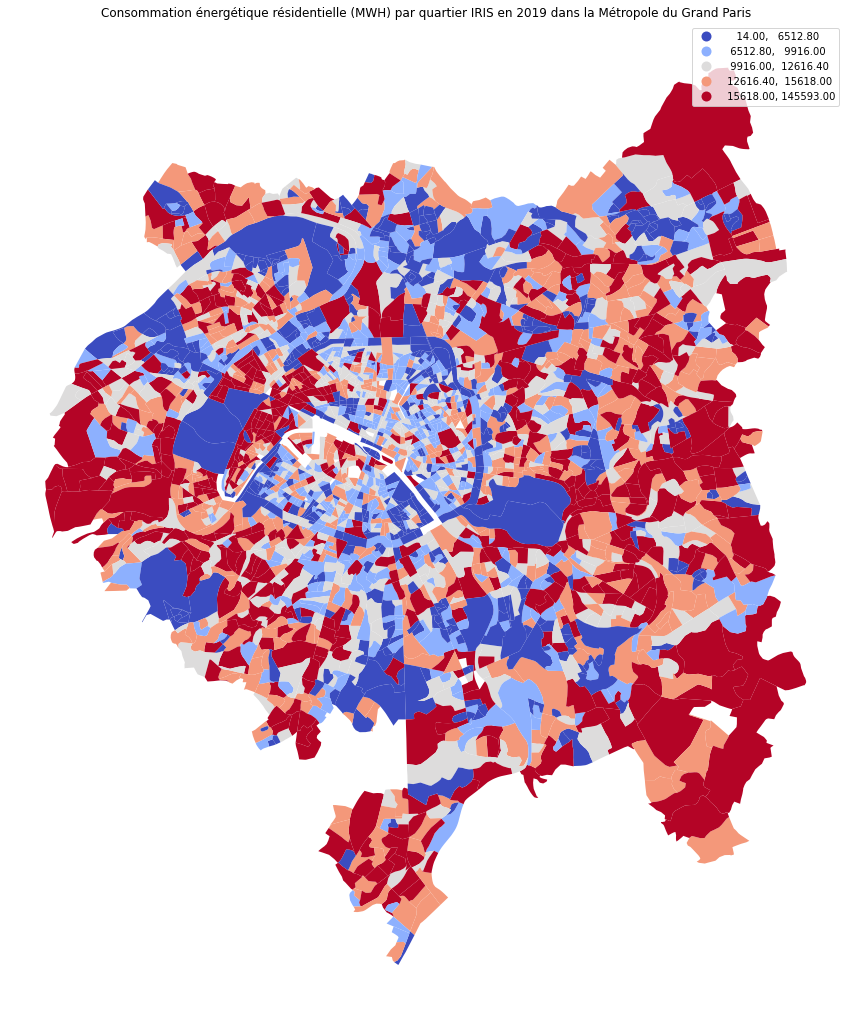

In [54]:
#Choix de couleur : coolwarm
fig, ax = plt.subplots(1, figsize=(15, 20)) 
dataset_final.plot(column="Conso", cmap="coolwarm", ax=ax, scheme='quantiles', legend=True)
plt.title("Consommation énergétique résidentielle (MWH) par quartier IRIS en 2019 dans la Métropole du Grand Paris")
plt.axis('off');